In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\97798\Desktop\ML\Week 10\bank_data.csv", sep = ',')

In [ ]:
data.columns

In [49]:
data.loan = data.loan.str.replace('unknown','no')

In [50]:

def remove_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):  # Check if the column contains numerical data
            # Calculate the IQR (Interquartile Range) for the column
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find the indices of outliers
            outlier_indices = (df[col] < lower_bound) | (df[col] > upper_bound)
            
            # Create a DataFrame containing the outliers
            col_outliers = df[outlier_indices]
            
            # Add the outliers to the dictionary
            outliers[col] = col_outliers
    
    # Remove the rows containing outliers from the original DataFrame
    for col, col_outliers in outliers.items():
        df = df[~df.index.isin(col_outliers.index)]
    
    # Print information about removed outliers and the new shape
    if outliers:
        print('These outliers have been removed from your dataset:')
        for col, col_outliers in outliers.items():
            print(f'\nOutliers in column "{col}":')
            print(col_outliers)
    else:
        print('No outliers were found in the dataset.')
    
    print('\nNew shape is:', df.shape)
    return df



In [54]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [72]:
data.to_csv('bank_data.csv')

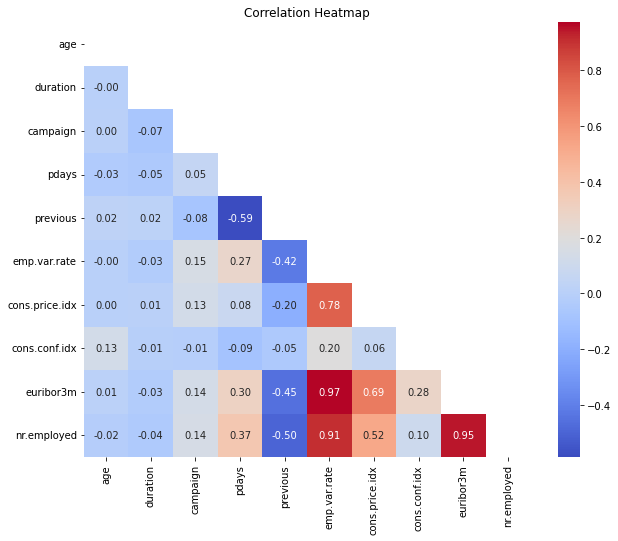

In [77]:
# Create a correlation matrix for your dataset
correlation_matrix = num_features.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the heatmap figure
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask = mask)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [8]:
data

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30355,41180,36,admin,married,university.degree,no,no,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30356,41181,37,admin,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30357,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30358,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
data.drop('Unnamed: 0', axis =1 ,inplace = True)

In [10]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30355,36,admin,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30356,37,admin,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30357,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30358,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [13]:
yes_data = data[data.y == 'yes']

In [14]:
no_data = data[data.y == 'no']

In [15]:
no_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30353,57,retired,married,professional.course,no,yes,no,cellular,nov,thu,...,6,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no
30354,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30355,36,admin,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30357,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [16]:
yes_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
122,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
131,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
822,37,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,yes
1118,46,blue-collar,single,basic.9y,no,yes,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
1240,54,admin,married,university.degree,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30346,38,housemaid,divorced,university.degree,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,yes
30350,33,student,married,professional.course,no,yes,no,telephone,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
30351,31,admin,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
30356,37,admin,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30355,36,admin,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30356,37,admin,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30357,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30358,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


<Axes: xlabel='loan', ylabel='count'>

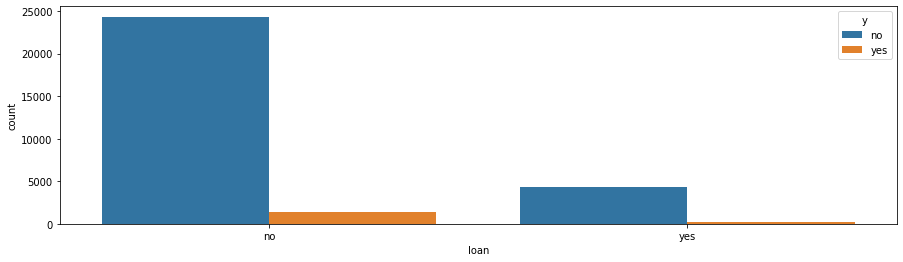

In [29]:
plt.figure(figsize=(15,4))
sns.countplot(
data = data,
x = 'loan', 
hue = 'y')

In [5]:
data

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30355,41180,36,admin,married,university.degree,no,no,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30356,41181,37,admin,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30357,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30358,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
data.drop(['Unnamed: 0'], axis =1, inplace = True)

In [7]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30355,36,admin,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30356,37,admin,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30357,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30358,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
data.isna().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [11]:
X = data.drop(['y'], axis =1)

In [12]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30355,36,admin,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
30356,37,admin,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
30357,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
30358,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [13]:
y = data.y

In [14]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
30355     no
30356    yes
30357     no
30358     no
30359    yes
Name: y, Length: 30360, dtype: object

In [15]:
num_features = data.select_dtypes(exclude='object')

In [16]:
cat_features = data.select_dtypes(include='object')

In [17]:
num_features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
30355,36,254,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
30356,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
30357,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
30358,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [18]:
cat_features

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
30355,admin,married,university.degree,no,no,no,cellular,nov,fri,nonexistent,no
30356,admin,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes
30357,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
30358,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no


In [31]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((24288, 20), (6072, 20))

In [33]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(num_features)

VarianceThreshold(threshold=0)

In [37]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(num_features)

VarianceThreshold(threshold=0)

In [38]:
var_thres.get_support()


array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True])

In [40]:
constant_columns = [column for column in num_features.columns
                    if column not in num_features.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [105]:
for column in constant_columns:
    print(column)

pdays
previous


In [107]:
X_train.drop(['pdays','previous'], axis =1, inplace = True)

In [45]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12238,31,entrepreneur,married,university.degree,unknown,no,no,cellular,jul,mon,97,2,nonexistent,1.4,93.918,-42.7,4.962,5228.1
12414,43,admin,married,high.school,no,no,no,cellular,jul,mon,81,3,nonexistent,1.4,93.918,-42.7,4.962,5228.1
21652,35,admin,married,university.degree,no,yes,no,cellular,nov,wed,94,1,nonexistent,-0.1,93.200,-42.0,4.120,5195.8
25702,35,blue-collar,married,basic.4y,no,yes,yes,cellular,may,thu,195,1,nonexistent,-1.8,92.893,-46.2,1.327,5099.1
20051,39,technician,married,professional.course,unknown,yes,no,cellular,aug,wed,145,2,nonexistent,1.4,93.444,-36.1,4.964,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,services,married,high.school,no,no,no,cellular,jul,thu,345,1,nonexistent,1.4,93.918,-42.7,4.958,5228.1
19648,31,technician,divorced,high.school,no,yes,no,cellular,aug,mon,81,3,nonexistent,1.4,93.444,-36.1,4.965,5228.1
9845,45,technician,married,university.degree,no,no,no,telephone,jun,thu,65,1,nonexistent,1.4,94.465,-41.8,4.961,5228.1
10799,39,services,married,high.school,unknown,yes,no,telephone,jul,mon,173,3,nonexistent,1.4,93.918,-42.7,4.960,5228.1


In [46]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [48]:
corr_features = correlation(num_features, 0.8)
len(set(corr_features))

2

In [49]:
corr_features

{'euribor3m', 'nr.employed'}

In [52]:
num_features.drop(['euribor3m','nr.employed'], axis =1 ,inplace = True)

In [53]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
12238,31,entrepreneur,married,university.degree,unknown,no,no,cellular,jul,mon,97,2,nonexistent,1.4,93.918,-42.7
12414,43,admin,married,high.school,no,no,no,cellular,jul,mon,81,3,nonexistent,1.4,93.918,-42.7
21652,35,admin,married,university.degree,no,yes,no,cellular,nov,wed,94,1,nonexistent,-0.1,93.200,-42.0
25702,35,blue-collar,married,basic.4y,no,yes,yes,cellular,may,thu,195,1,nonexistent,-1.8,92.893,-46.2
20051,39,technician,married,professional.course,unknown,yes,no,cellular,aug,wed,145,2,nonexistent,1.4,93.444,-36.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,services,married,high.school,no,no,no,cellular,jul,thu,345,1,nonexistent,1.4,93.918,-42.7
19648,31,technician,divorced,high.school,no,yes,no,cellular,aug,mon,81,3,nonexistent,1.4,93.444,-36.1
9845,45,technician,married,university.degree,no,no,no,telephone,jun,thu,65,1,nonexistent,1.4,94.465,-41.8
10799,39,services,married,high.school,unknown,yes,no,telephone,jul,mon,173,3,nonexistent,1.4,93.918,-42.7


In [54]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
8771,28,admin,single,university.degree,no,no,no,telephone,jun,wed,203,3,nonexistent,1.4,94.465,-41.8
16500,46,blue-collar,married,basic.4y,no,yes,no,cellular,aug,wed,269,3,nonexistent,1.4,93.444,-36.1
3673,27,student,single,university.degree,no,yes,no,telephone,may,mon,104,1,nonexistent,1.1,93.994,-36.4
4391,31,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,wed,67,5,nonexistent,1.1,93.994,-36.4
26791,26,student,single,high.school,no,no,no,telephone,may,wed,29,4,nonexistent,-1.8,92.893,-46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15798,40,technician,married,university.degree,no,no,no,cellular,jul,thu,122,1,nonexistent,1.4,93.918,-42.7
18998,53,services,married,high.school,no,no,no,cellular,aug,thu,62,2,nonexistent,1.4,93.444,-36.1
19057,50,admin,married,basic.9y,unknown,yes,no,cellular,aug,thu,122,3,nonexistent,1.4,93.444,-36.1
12446,36,technician,divorced,professional.course,no,yes,no,cellular,jul,mon,643,2,nonexistent,1.4,93.918,-42.7


In [57]:
num_features

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,261,1,1.1,93.994,-36.4
1,57,149,1,1.1,93.994,-36.4
2,37,226,1,1.1,93.994,-36.4
3,40,151,1,1.1,93.994,-36.4
4,56,307,1,1.1,93.994,-36.4
...,...,...,...,...,...,...
30355,36,254,2,-1.1,94.767,-50.8
30356,37,281,1,-1.1,94.767,-50.8
30357,46,383,1,-1.1,94.767,-50.8
30358,56,189,2,-1.1,94.767,-50.8


In [62]:
cat_features.drop(['y'], axis =1, inplace = True)

Trained with no Feature Selection

In [232]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler()
                                            , num_features.columns)
    ],
    remainder='passthrough'
)

sm = SMOTE(random_state=27)


def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),
# 
        
        ('model', model),
    ])
    
    
    pipe.fit(X_train, y_train)  # Train the model with resampled data
    y_pred = pipe.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check the unique labels in the target variable and set pos_label accordingly
    unique_labels = np.unique(y_test)
    if len(unique_labels) == 2:
        pos_label = unique_labels[1]  # Assuming '1' is the positive label
    else:
        pos_label = None
    
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    
    return accuracy, precision, recall, f1

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different models
classification_models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Naive Bayes (GaussianNB)': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    
}


for model_name, model in classification_models.items():
    accuracy, precision, recall, f1 = evaluate_classification_model(model, X_train, y_train, X_test, y_test)
    print(f'Metrics for {model_name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print()

Metrics for Logistic Regression:
Accuracy: 0.9440
Precision: 0.5303
Recall: 0.2011
F1 Score: 0.2917

Metrics for Random Forest Classifier:
Accuracy: 0.9483
Precision: 0.6024
Recall: 0.2874
F1 Score: 0.3891

Metrics for Gradient Boosting Classifier:
Accuracy: 0.9494
Precision: 0.6133
Recall: 0.3190
F1 Score: 0.4197

Metrics for AdaBoost Classifier:
Accuracy: 0.9447
Precision: 0.5341
Recall: 0.2701
F1 Score: 0.3588

Metrics for Bagging Classifier:
Accuracy: 0.9452
Precision: 0.5369
Recall: 0.3132
F1 Score: 0.3956

Metrics for Extra Trees Classifier:
Accuracy: 0.9430
Precision: 0.5057
Recall: 0.2557
F1 Score: 0.3397

Metrics for Support Vector Classifier:
Accuracy: 0.9427
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Metrics for K-Nearest Neighbors (KNN):
Accuracy: 0.9435
Precision: 0.5137
Recall: 0.2701
F1 Score: 0.3540

Metrics for Naive Bayes (GaussianNB):
Accuracy: 0.9190
Precision: 0.3647
Recall: 0.5575
F1 Score: 0.4409

Metrics for Decision Tree Classifier:
Accuracy: 0.9312
Pre

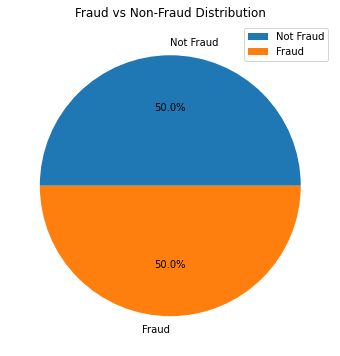

In [273]:
from sklearn.utils import resample


not_fraud = data[data.y == 'no']
fraud = data[data.y == 'yes']

# Upsample the fraud class
fraud_data_upsampled = resample(
    fraud,
    replace=True,
    n_samples=len(not_fraud),
    random_state=27
)

# Concatenate the upsampled fraud data with the original non-fraud data
upsampled = pd.concat([not_fraud, fraud_data_upsampled])

# Visualize the class distribution with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(upsampled.y.value_counts(), autopct='%1.1f%%', labels=['Not Fraud', 'Fraud'])
plt.legend()
plt.title('Fraud vs Non-Fraud Distribution')
plt.show()

In [279]:
upsampled.drop(['pdays','campaign'], axis =1, inplace = True)

In [280]:
upsampled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,151,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,0,nonexistent,1.1,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28848,61,admin,married,university.degree,no,yes,yes,telephone,jul,wed,261,0,nonexistent,-2.9,92.469,-33.6,yes
20432,56,admin,married,university.degree,no,no,no,telephone,oct,fri,235,0,nonexistent,-0.1,93.798,-40.4,yes
17020,41,technician,divorced,university.degree,no,no,no,cellular,aug,fri,519,0,nonexistent,1.4,93.444,-36.1,yes
23141,43,blue-collar,married,basic.9y,no,no,no,cellular,mar,tue,180,0,nonexistent,-1.8,92.843,-50.0,yes


In [281]:
X = upsampled.drop(['y'], axis =1)

In [282]:
y = upsampled.y

In [283]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,0,nonexistent,1.1,93.994,-36.4
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,0,nonexistent,1.1,93.994,-36.4
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,0,nonexistent,1.1,93.994,-36.4
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,151,0,nonexistent,1.1,93.994,-36.4
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,0,nonexistent,1.1,93.994,-36.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28848,61,admin,married,university.degree,no,yes,yes,telephone,jul,wed,261,0,nonexistent,-2.9,92.469,-33.6
20432,56,admin,married,university.degree,no,no,no,telephone,oct,fri,235,0,nonexistent,-0.1,93.798,-40.4
17020,41,technician,divorced,university.degree,no,no,no,cellular,aug,fri,519,0,nonexistent,1.4,93.444,-36.1
23141,43,blue-collar,married,basic.9y,no,no,no,cellular,mar,tue,180,0,nonexistent,-1.8,92.843,-50.0


In [284]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
28848    yes
20432    yes
17020    yes
23141    yes
27009    yes
Name: y, Length: 57410, dtype: object

In [365]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((40187, 16), (17223, 16))

In [402]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler()
                                            , num_features.columns)
    ],
    remainder='passthrough'
)

# sm = SMOTE(random_state=27)


def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),
# 
        
        ('model', model),
    ])
    
    
    pipe.fit(X_train, y_train)  # Train the model with resampled data
    y_pred = pipe.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check the unique labels in the target variable and set pos_label accordingly
    unique_labels = np.unique(y_test)
    if len(unique_labels) == 2:
        pos_label = unique_labels[1]  # Assuming '1' is the positive label
    else:
        pos_label = None
    
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    
    return accuracy, precision, recall, f1

# Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different models
classification_models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Naive Bayes (GaussianNB)': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
 
    'AdaBoost': AdaBoostClassifier(),
    
}


for model_name, model in classification_models.items():
    accuracy, precision, recall, f1 = evaluate_classification_model(model, X_train, y_train, X_test, y_test)
    print(f'Metrics for {model_name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print()
    
    
# # Loop through models and evaluate them using cross-validation
# for model_name, model in classification_models.items():
#     evaluate_classification_model(model, X, y)    

Metrics for Logistic Regression:
Accuracy: 0.8803
Precision: 0.8635
Recall: 0.9042
F1 Score: 0.8834

Metrics for Random Forest Classifier:
Accuracy: 0.9835
Precision: 0.9681
Recall: 1.0000
F1 Score: 0.9838

Metrics for Gradient Boosting Classifier:
Accuracy: 0.8926
Precision: 0.8647
Recall: 0.9317
F1 Score: 0.8969

Metrics for AdaBoost Classifier:
Accuracy: 0.8776
Precision: 0.8787
Recall: 0.8769
F1 Score: 0.8778

Metrics for Bagging Classifier:
Accuracy: 0.9812
Precision: 0.9639
Recall: 1.0000
F1 Score: 0.9816

Metrics for Extra Trees Classifier:
Accuracy: 0.9890
Precision: 0.9786
Recall: 1.0000
F1 Score: 0.9892

Metrics for Support Vector Classifier:
Accuracy: 0.9234
Precision: 0.8882
Recall: 0.9691
F1 Score: 0.9269

Metrics for K-Nearest Neighbors (KNN):
Accuracy: 0.9475
Precision: 0.9060
Recall: 0.9990
F1 Score: 0.9502

Metrics for Naive Bayes (GaussianNB):
Accuracy: 0.8012
Precision: 0.8020
Recall: 0.8014
F1 Score: 0.8017

Metrics for Decision Tree Classifier:
Accuracy: 0.9779
Pre

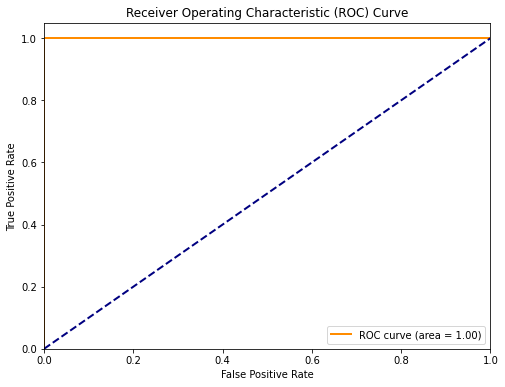

In [408]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)

# Define your model
model = ExtraTreesClassifier()

# Create a pipeline
pipe = Pipeline([
    ('Transform', step1),
    ('model', model),
])

# Fit the pipeline
pipe.fit(X_train, y_train)

unique_labels = np.unique(y)
if len(unique_labels) == 2:
    pos_label = unique_labels[1]  # Assuming '1' is the positive label
else:
    pos_label = None  # If it's not binary, you can set it to None or specify the positive class label

# Predict probabilities for the positive class (class 1)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=pos_label)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

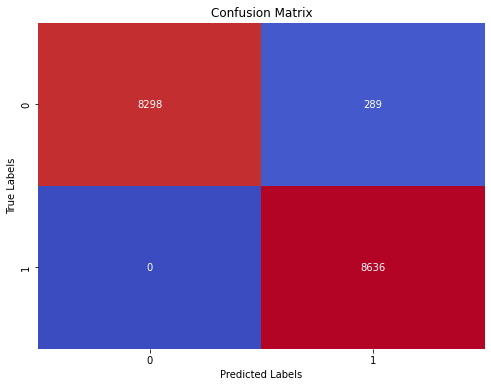

In [404]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)

# Define your model
model = RandomForestClassifier()

# Create a pipeline
pipe = Pipeline([
    ('Transform', step1),
    ('model', model),
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipe.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with cool colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [410]:
model = RandomForestClassifier(
 
)


# Create a pipeline
pipe = Pipeline([
    ('Transform', step1),
    ('model', model),
])

In [411]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Assuming you have already defined your pipeline 'pipe' and X, y
kfold_validation=KFold(4)

# Perform k-fold cross-validation (e.g., 5-fold)
k = 5 # You can adjust the number of folds as needed
accuracy_scores = cross_val_score(pipe, X, y, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy Scores for Each Fold:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Fold {i + 1}: {accuracy:.4f}")
    
mean_accuracy = accuracy_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.3f}")


Accuracy Scores for Each Fold:
Fold 1: 0.9821
Fold 2: 0.7721
Fold 3: 0.9708
Fold 4: 0.7741
Fold 5: 0.5589
Mean Accuracy: 0.812


In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=RandomForestClassifier()
scores=cross_val_score(pipe
                       ,X,y,cv=skfold)
print(np.mean(scores))